## Importing the Necessary Packages

In [35]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import plotly.graph_objs as go
import seaborn as sns
sns.set()

## Loading Data

In [36]:
raw_data = pd.read_csv('1.06 STATION GALACHIPA.csv')
raw_data.head()

,YEAR,MONTH,DAY,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,HIGH,LOW
0,2019,1,1,101.75,14.46,23.44,0.0,4.62,73.38,15.35,12.934,5.314,0.591,-1.032
1,2019,1,2,101.74,13.89,23.02,0.0,4.54,70.12,15.62,12.992,5.136,0.456,-1.011
2,2019,1,3,101.77,12.73,23.28,0.0,3.90,64.50,16.26,12.980,4.968,0.452,-1.055
3,2019,1,4,101.85,11.63,22.29,0.0,6.30,68.44,13.76,13.045,4.876,0.432,-0.814
4,2019,1,5,101.68,12.56,22.74,0.0,6.04,70.56,13.69,13.147,4.750,0.351,-0.970


## Handling Null Values

In [37]:
raw_data.isnull().sum()

YEAR                 0
MONTH                0
DAY                  0
SURFACE PRESSURE     0
DEW POINT            0
TEMPERATURE          0
PRECIPITATION        0
MAX WIND SPD         0
RELATIVE HUMIDITY    0
MIN TEMP             0
N_ICE EXTENT         0
S_ICE EXTENT         0
HIGH                 0
LOW                  0
dtype: int64

In [38]:
data_no_mv = raw_data.dropna(axis=0)
data_no_mv.describe(include='all')

,YEAR,MONTH,DAY,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,HIGH,LOW
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.00000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,2020.000000,6.521898,15.732664,100.838312,22.263193,28.270648,20.256989,6.413531,80.11000,24.239617,10.299108,11.332430,1.165382,-0.781486
std,0.816497,3.450561,8.805388,0.534903,4.738568,3.036868,46.388510,2.545048,8.23865,4.550932,3.616422,5.727137,0.462333,0.576054
min,2019.000000,1.000000,1.000000,99.160000,9.240000,19.080000,0.000000,1.750000,53.06000,13.520000,3.793000,2.427000,0.073800,-1.656200
25%,2019.000000,4.000000,8.000000,100.410000,18.840000,26.495000,0.000000,4.717500,74.75000,20.877500,6.696000,5.632750,0.833350,-1.136000
50%,2020.000000,7.000000,16.000000,100.875000,24.055000,29.295000,3.915000,5.945000,82.19000,26.455000,11.213000,12.027000,1.164000,-0.861000
75%,2021.000000,10.000000,23.000000,101.290000,26.230000,30.230000,21.230000,7.410000,86.69000,27.882500,13.570250,17.068750,1.505000,-0.553500
max,2021.000000,12.000000,31.000000,101.900000,28.000000,35.530000,533.680000,23.530000,92.75000,29.300000,15.071000,19.062000,2.549000,2.078000


## Distribution Check and Dealing With Outliers

In [39]:
df = data_no_mv

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


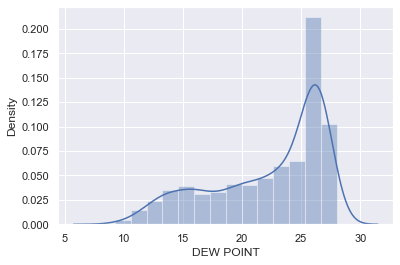

In [40]:
sns.distplot(df['DEW POINT'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


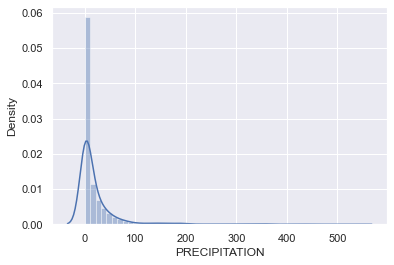

In [41]:
sns.distplot(df['PRECIPITATION'])
plt.show()

In [42]:
#q = df['PRECIPITATION'].quantile(0.99)
#data_1 = df[df['PRECIPITATION']<q]
#sns.distplot(data_1['PRECIPITATION'])
#plt.show()

In [43]:
#data_cleaned = data_1.reset_index(drop=True)
data_cleaned = df.reset_index(drop=True)

In [44]:
data_cleaned = data_cleaned.drop(['HIGH'],axis=1)
data_cleaned.describe(include='all')

,YEAR,MONTH,DAY,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,LOW
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.00000,1096.000000,1096.000000,1096.000000,1096.000000
mean,2020.000000,6.521898,15.732664,100.838312,22.263193,28.270648,20.256989,6.413531,80.11000,24.239617,10.299108,11.332430,-0.781486
std,0.816497,3.450561,8.805388,0.534903,4.738568,3.036868,46.388510,2.545048,8.23865,4.550932,3.616422,5.727137,0.576054
min,2019.000000,1.000000,1.000000,99.160000,9.240000,19.080000,0.000000,1.750000,53.06000,13.520000,3.793000,2.427000,-1.656200
25%,2019.000000,4.000000,8.000000,100.410000,18.840000,26.495000,0.000000,4.717500,74.75000,20.877500,6.696000,5.632750,-1.136000
50%,2020.000000,7.000000,16.000000,100.875000,24.055000,29.295000,3.915000,5.945000,82.19000,26.455000,11.213000,12.027000,-0.861000
75%,2021.000000,10.000000,23.000000,101.290000,26.230000,30.230000,21.230000,7.410000,86.69000,27.882500,13.570250,17.068750,-0.553500
max,2021.000000,12.000000,31.000000,101.900000,28.000000,35.530000,533.680000,23.530000,92.75000,29.300000,15.071000,19.062000,2.078000


In [34]:
data_cleaned.corr()['LOW']

YEAR                 0.147580
MONTH                0.181646
DAY                  0.034829
SURFACE PRESSURE    -0.365377
DEW POINT            0.404722
TEMPERATURE          0.252105
PRECIPITATION        0.196021
MAX WIND SPD         0.218317
RELATIVE HUMIDITY    0.348564
MIN TEMP             0.392848
N_ICE EXTENT        -0.327950
S_ICE EXTENT         0.365715
LOW                  1.000000
Name: LOW, dtype: float64

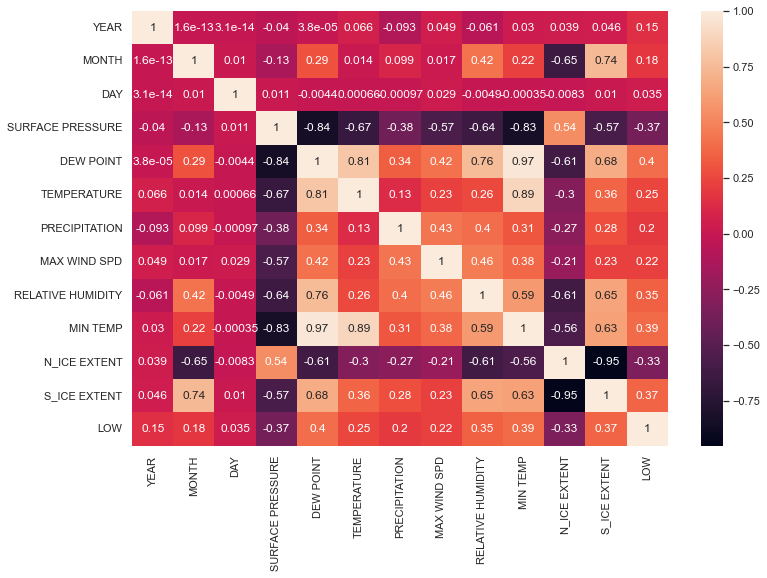

In [46]:
fig_dims = (12,8)
fig,ax = plt.subplots(figsize=fig_dims)
sns.heatmap(data_cleaned.corr(), ax=ax,annot=True)
plt.show()

In [13]:
#data_cleaned = data_cleaned.drop(['DEW POINT'],axis=1)
data_cleaned = data_cleaned.drop(['SURFACE PRESSURE'],axis=1)
data_cleaned = data_cleaned.drop(['MIN TEMP'],axis=1)
data_cleaned = data_cleaned.drop(['N_ICE EXTENT'],axis=1)
#data_cleaned = data_cleaned.drop(['Total_ICE EXTENT'],axis=1)
data_cleaned = data_cleaned.drop(['TEMPERATURE'],axis=1)
#data_cleaned = data_cleaned.drop(['RELATIVE HUMIDITY'],axis=1)
data_cleaned.describe(include='all')

,YEAR,MONTH,DAY,DEW POINT,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,S_ICE EXTENT,LOW
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.00000,1096.000000,1096.000000
mean,2020.000000,6.521898,15.732664,22.263193,20.256989,6.413531,80.11000,11.332430,-0.781486
std,0.816497,3.450561,8.805388,4.738568,46.388510,2.545048,8.23865,5.727137,0.576054
min,2019.000000,1.000000,1.000000,9.240000,0.000000,1.750000,53.06000,2.427000,-1.656200
25%,2019.000000,4.000000,8.000000,18.840000,0.000000,4.717500,74.75000,5.632750,-1.136000
50%,2020.000000,7.000000,16.000000,24.055000,3.915000,5.945000,82.19000,12.027000,-0.861000
75%,2021.000000,10.000000,23.000000,26.230000,21.230000,7.410000,86.69000,17.068750,-0.553500
max,2021.000000,12.000000,31.000000,28.000000,533.680000,23.530000,92.75000,19.062000,2.078000


In [14]:
data_cleaned.describe(include='all')

,YEAR,MONTH,DAY,DEW POINT,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,S_ICE EXTENT,LOW
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.00000,1096.000000,1096.000000
mean,2020.000000,6.521898,15.732664,22.263193,20.256989,6.413531,80.11000,11.332430,-0.781486
std,0.816497,3.450561,8.805388,4.738568,46.388510,2.545048,8.23865,5.727137,0.576054
min,2019.000000,1.000000,1.000000,9.240000,0.000000,1.750000,53.06000,2.427000,-1.656200
25%,2019.000000,4.000000,8.000000,18.840000,0.000000,4.717500,74.75000,5.632750,-1.136000
50%,2020.000000,7.000000,16.000000,24.055000,3.915000,5.945000,82.19000,12.027000,-0.861000
75%,2021.000000,10.000000,23.000000,26.230000,21.230000,7.410000,86.69000,17.068750,-0.553500
max,2021.000000,12.000000,31.000000,28.000000,533.680000,23.530000,92.75000,19.062000,2.078000


## Neural Network Regression

### Train-Test Split

In [15]:
dataset = data_cleaned
train_dataset = dataset.sample(frac=0.8,random_state=22)
test_dataset = dataset.drop(train_dataset.index)

#### Separate the target value, or “label”, from the features. This label is the value that we will train the model to predict.

In [16]:
train_labels = train_dataset.pop('LOW')
test_labels = test_dataset.pop('LOW')

### Scaling the Input Data

In [17]:
scaler=MinMaxScaler()
scaler.fit(train_dataset)
normed_train_data = scaler.transform(train_dataset)
scaler.fit(test_dataset)
normed_test_data = scaler.transform(test_dataset)

### Model

In [18]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.tanh, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.tanh),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)
  #optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [19]:
NN_model = build_model()
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


### Training

In [20]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1200

history = NN_model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [21]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
1195,0.026653,0.123201,0.026653,0.064507,0.194409,0.064507,1195
1196,0.026617,0.121065,0.026617,0.059570,0.188819,0.059570,1196
1197,0.027363,0.123348,0.027363,0.057955,0.183354,0.057955,1197
1198,0.025876,0.122138,0.025876,0.058928,0.184341,0.058928,1198
1199,0.026025,0.122240,0.026025,0.069956,0.193382,0.069956,1199


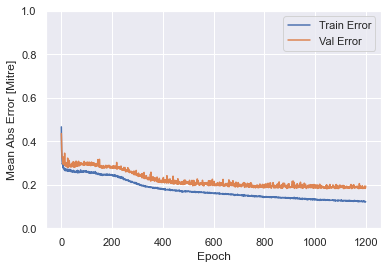

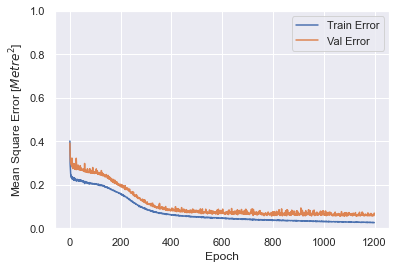

In [22]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Mitre]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Metre^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()
  plt.show()


plot_history(history)


......................................

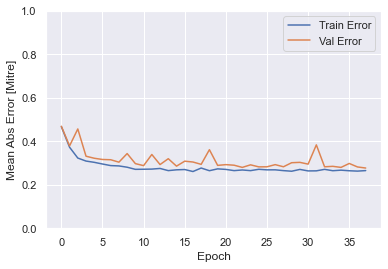

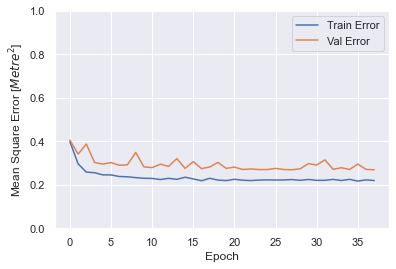

In [23]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                   validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

### Testing

In [24]:
loss, mae, mse = NN_model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} M".format(mae))

Testing set Mean Abs Error:  0.22 M


In [25]:
y_pred_NN = NN_model.predict(normed_test_data)
Test_score_NN =r2_score(test_labels,y_pred_NN)
print("Testing Score: ",Test_score_NN)

Testing Score:  0.7333840567905736


### Visulizing Predictions

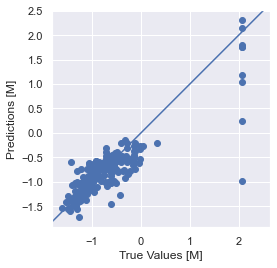

In [26]:
y_pred_NN = NN_model.predict(normed_test_data).flatten()

plt.scatter(test_labels, y_pred_NN)
plt.xlabel('True Values [M]')
plt.ylabel('Predictions [M]')
plt.axis('equal')
plt.axis('square')

_ = plt.plot([-100, 100], [-100, 100])
plt.show()

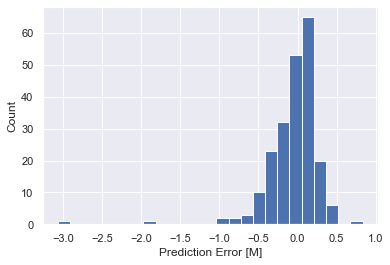

In [27]:
error = y_pred_NN - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [M]")
_ = plt.ylabel("Count")
plt.show()

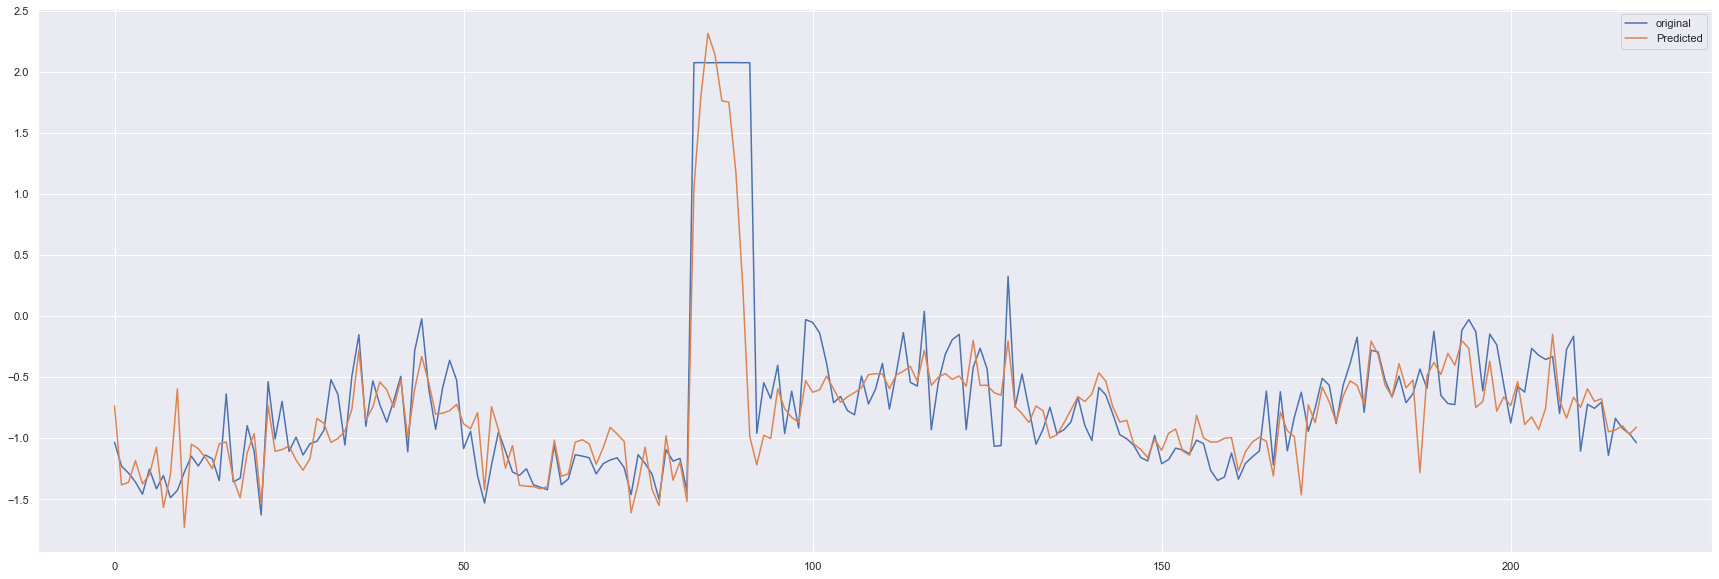

In [28]:
x_ax = range(len(test_labels))
plt.figure(figsize=(30,10))
plt.plot(x_ax, test_labels,label="original")
plt.plot(x_ax, y_pred_NN, label="Predicted")
plt.legend()
plt.show()

In [29]:
data_wmv = raw_data[raw_data.isnull().any(axis=1)]
data_wmv.head()

,YEAR,MONTH,DAY,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,HIGH,LOW
